In [1]:
!pip install tensorflow==2.5.0

In [2]:
!pip install tensorflow-gpu==2.5.0

^C


In [3]:
!pip install keras

^C


In [4]:
!pip install opencv-python

^C


In [5]:
!pip install matplotlib

^C


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [6]:
import keras
keras.__version__

AttributeError: module 'keras' has no attribute '__version__'

In [5]:
from tensorflow import keras

keras.__version__

'2.5.0'

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9395637678041425485,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2362966016
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5982878518010407881
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [7]:
tdata = pd.read_csv("C:/data_warehouse/Project/data/Training/labels/model2_train_label.csv")
tdata

,Unnamed: 0,imgName,man,woman,ivy,feminine,classic,mods,minimal,popart,...,res_by_40s_old,res_by_50s_old,res_by_housewife_job,res_by_special_job,res_by_survice_job,res_by_whitecollar_job,res_by_student_job,res_by_etc_job,res_by_single,res_by_married
0,0,T_00001_50_ivy_M.jpg,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,T_00002_90_hiphop_M.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,T_00003_19_normcore_M.jpg,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,3,T_00004_90_hiphop_M.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,4,T_00005_80_bold_M.jpg,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85234,85234,W_96643_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
85235,85235,W_96645_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
85236,85236,W_96646_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
85237,85237,W_96649_60_space_W.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [8]:
vdata = pd.read_csv("C:/data_warehouse/Project/data/Validation/labels/model2_test_label.csv")
vdata

,Unnamed: 0,imgName,man,woman,ivy,feminine,classic,mods,minimal,popart,...,res_by_40s_old,res_by_50s_old,res_by_housewife_job,res_by_special_job,res_by_survice_job,res_by_whitecollar_job,res_by_student_job,res_by_etc_job,res_by_single,res_by_married
0,0,T_00017_19_normcore_M.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,T_00031_10_sportivecasual_M.jpg,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,2,T_00035_19_normcore_M.jpg,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,3,T_00037_10_sportivecasual_M.jpg,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,4,T_00042_10_sportivecasual_M.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327,13327,W_96194_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
13328,13328,W_96339_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
13329,13329,W_96431_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
13330,13330,W_96595_60_minimal_W.jpg,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import randrange
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Activation, Flatten, Dropout, BatchNormalization
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

# K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10251301740932981117,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2362966016
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3333670240362278465
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [10]:
# 경로 설정
train_image_path = 'C:/data_warehouse/Project/data/Training/images/' #**

test_image_path = 'C:/data_warehouse/Project/data/Validation/images/' #**

In [41]:
import json

# 훈련용 라벨데이터(체크용 : 원핫X) 불러오기
with open('C:/data_warehouse/Project/data/Training/labels/labels_for_check.json', encoding='utf-8-sig') as f:
    tjs_fc = json.loads(f.read())

tdata_fc = pd.DataFrame(tjs_fc)

# 테스트용 라벨데이터(체크용 : 원핫X) 불러오기
with open('C:/data_warehouse/Project/data/Validation/labels/labels_for_check.json', encoding='utf-8-sig') as f:
    vjs_fc = json.loads(f.read())

vdata_fc = pd.DataFrame(vjs_fc)

Unnamed: 0                                    65825
imgName                   W_66224_19_normcore_M.jpg
man                                               1
woman                                             0
ivy                                               0
                                    ...            
res_by_whitecollar_job                            0
res_by_student_job                                0
res_by_etc_job                                    0
res_by_single                                     0
res_by_married                                    1
Name: 65825, Length: 110, dtype: object


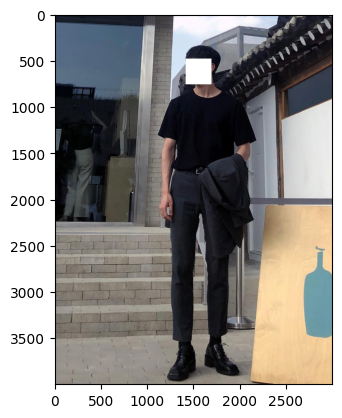

In [16]:
# 샘플 이미지
import matplotlib.pyplot as plt
i = 65825
# imgPath = train_image_path + tdata.iloc[i]['imgName']
imgPath = "C:/Users/gjaischool1/Desktop/원본m.jpg"
a = plt.imread(imgPath) #**
plt.imshow(a)
# print(tdata_fc.loc[79616]['imgName'])
print(tdata.iloc[i])

In [15]:
image = cv2.imread(imgPath)

'C:/data_warehouse/Project/data/Training/images/T_00122_19_normcore_M.jpg'

In [17]:
import cv2
import numpy as np

# Load YOLOv3 model with pre-trained weights
net = cv2.dnn.readNet("C:\data_warehouse\Project\data\yolov3.weights", "C:\data_warehouse\Project\data\yolov3.cfg")
    
# Load COCO names
with open("C:\data_warehouse\Project\data\coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

image = cv2.imread(imgPath)
    
# Get image shape
height, width = image.shape[:2]
    
# Prepare input blob
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Get output layer names
output_layers = net.getUnconnectedOutLayersNames()

# Run forward pass to get predictions
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

# Process the detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and classes[class_id] == "person":
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w = int(detection[2] * image.shape[1])
            h = int(detection[3] * image.shape[0])
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

if not boxes:
    print("사람이 감지되지 않았습니다.")

else:
    # 가장 큰 사각형 찾기
    max_area = 0
    max_box = None
    for box in boxes:
        x, y, w, h = box
        area = w * h
        if area > max_area:
            max_area = area
            max_box = box

    # ROI 설정
    if max_box is not None:
        x, y, w, h = max_box
        roi = image[y:y + h, x:x + w]

        # 이미지가 비어 있는지 확인
        if not roi.size == 0:
            # ROI 이미지 크기 변경 (예: 0.1배로 축소)
            roi = cv2.resize(roi, None, fx=0.1, fy=0.1)

            # 결과 출력
            plt.imshow(roi)
            plt.show()
        else:
            print("ROI가 비어 있습니다.")
            plt.imshow(image)
            plt.show()
    else:
        print("가장 큰 사각형을 찾을 수 없습니다.")
        plt.imshow(roi)
        plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
import cv2
import numpy as np

# Load YOLOv3 model with pre-trained weights
net = cv2.dnn.readNet("E:\data_warehouse\Project\data\yolov3.weights", "E:\data_warehouse\Project\data\yolov3.cfg")
    
# Load COCO names
with open("E:\data_warehouse\Project\data\coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
for i in range(85238):
    imgPath = train_image_path + tdata.iloc[i]['imgName']
    # Load image
    image = cv2.imread(imgPath)
    
    image = cv2.resize(image, (0,0), fx=0.1, fy=0.1)
    save_path = "E:/data_warehouse/Project/data/Training/resize_images/" +  tdata.iloc[i]['imgName']
    cv2.imwrite(save_path, image)
    
#     # Get image shape
#     height, width = image.shape[:2]
    
#     # Prepare input blob
#     blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#     net.setInput(blob)

#     # Get output layer names
#     output_layers = net.getUnconnectedOutLayersNames()

#     # Run forward pass to get predictions
#     outs = net.forward(output_layers)

#     class_ids = []
#     confidences = []
#     boxes = []

#     # Process the detections
#     for out in outs:
#         for detection in out:
#             scores = detection[5:]
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]
#             if confidence > 0.5 and classes[class_id] == "person":
#                 center_x = int(detection[0] * image.shape[1])
#                 center_y = int(detection[1] * image.shape[0])
#                 w = int(detection[2] * image.shape[1])
#                 h = int(detection[3] * image.shape[0])
#                 x = int(center_x - w / 2)
#                 y = int(center_y - h / 2)
#                 class_ids.append(class_id)
#                 confidences.append(float(confidence))
#                 boxes.append([x, y, w, h])

#     if not boxes:
#         print("사람이 감지되지 않았습니다.")

#     else:
#         # 가장 큰 사각형 찾기
#         max_area = 0
#         max_box = None
#         for box in boxes:
#             x, y, w, h = box
#             area = w * h
#             if area > max_area:
#                 max_area = area
#                 max_box = box

#         # ROI 설정
#         if max_box is not None:
#             x, y, w, h = max_box
#             roi = image[y:y + h, x:x + w]

#             # 이미지가 비어 있는지 확인
#             if not roi.size == 0:
#                 try:
#                     # ROI 이미지 크기 변경 (예: 0.1배로 축소)
#                     roi = cv2.resize(roi, (0,0), fx=0.1, fy=0.1)

#                     h, w = roi.shape[:2]

#                     save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
#                     cv2.imwrite(save_path, roi)
#                 except:
#                     print(tdata.iloc[i]['imgName'] + "ROI 사이즈 문제")
#                     image = cv2.resize(image, (0,0), fx=0.1, fy=0.1)
#                     save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
#                     cv2.imwrite(save_path, image)
#             else:
#                 print(tdata.iloc[i]['imgName'] + "ROI가 비어 있습니다.")
#                 image = cv2.resize(image, (0,0), fx=0.1, fy=0.1)
#                 save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
#                 cv2.imwrite(save_path, image)
#         else:
#             print(tdata.iloc[i]['imgName'] + "가장 큰 사각형을 찾을 수 없습니다.")
#             image = cv2.resize(image, (0,0), fx=0.1, fy=0.1)
#             save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
#             cv2.imwrite(save_path, image)


In [ ]:
import cv2
import numpy as np

# Load YOLOv3 model with pre-trained weights
net = cv2.dnn.readNet("E:\data_warehouse\Project\data\yolov3.weights", "E:\data_warehouse\Project\data\yolov3.cfg")
    
# Load COCO names
with open("E:\data_warehouse\Project\data\coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
for i in range(85238):
    imgPath = test_image_path + vdata.iloc[i]['imgName']
    # Load image
    image = cv2.imread(imgPath)
    
    image = cv2.resize(image, (0,0), fx=0.1, fy=0.1)
    save_path = "E:/data_warehouse/Project/data/Validation/resize_images/" +  vdata.iloc[i]['imgName']
    cv2.imwrite(save_path, image)

In [ ]:

                save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
                cv2.imwrite(save_path, roi)
            else:
                print(tdata.iloc[i]['imgName'] + "ROI가 비어 있습니다.")
                save_path = "C:/data_warehouse/Project/data/Training/roi_images/" +  tdata.iloc[i]['imgName']
                cv2.imwrite(save_path, image)

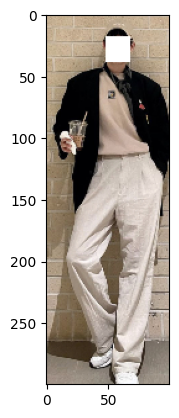

In [23]:
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
plt.imshow(roi)

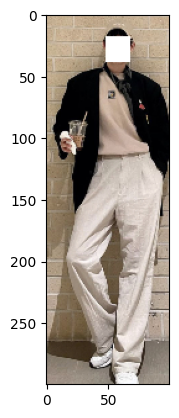

In [24]:
roi = cv2.resize(roi, (100, 300))
plt.imshow(roi)

In [ ]:
cv2.imwrite

In [9]:
X_train = tdata['imgName'] # 이미지 파일

y_train = tdata[["man","woman", "ivy","feminine","classic","mods","minimal","popart","space","hippie","disco","military","punk","bold","powersuit","bodyconscious","hiphop",
          "kitsch","lingerie","grunge","metrosexual","cityglam","oriental","ecology","sportivecasual","athleisure","lounge","normcore","genderless","1950","1960","1970","1980","1990","2000","2010","2020",
              "very_Good","good","bad","very_Bad", "spring_Autumn","summer","winter", "go_Work","date","official_Meeting","social_Gathering","daily","sports","travel","etc", "loose_Fit","normal_Fit","tight_Fit", "dark","bright",
              "cool","warm", "heavy","light", "not_stylish","stylish", "not_urban","urban", "not_trendy","trendy", "not_sophist","sophist",
              "not_neat","neat", "not_fancy","fancy", "not_unique","unique", "not_plain","plain", "not_open","open", "not_practical","practical",
              "not_active","active", "not_comfort","comfort", "not_lively","lively", "not_womanly","womanly", "not_manly","manly", "not_soft","soft"]]

In [10]:
X_test = vdata['imgName'] # 이미지 파일
y_test = vdata[["man","woman", "ivy","feminine","classic","mods","minimal","popart","space","hippie","disco","military","punk","bold","powersuit","bodyconscious","hiphop",
          "kitsch","lingerie","grunge","metrosexual","cityglam","oriental","ecology","sportivecasual","athleisure","lounge","normcore","genderless","1950","1960","1970","1980","1990","2000","2010","2020",
              "very_Good","good","bad","very_Bad", "spring_Autumn","summer","winter", "go_Work","date","official_Meeting","social_Gathering","daily","sports","travel","etc", "loose_Fit","normal_Fit","tight_Fit", "dark","bright",
              "cool","warm", "heavy","light", "not_stylish","stylish", "not_urban","urban", "not_trendy","trendy", "not_sophist","sophist",
              "not_neat","neat", "not_fancy","fancy", "not_unique","unique", "not_plain","plain", "not_open","open", "not_practical","practical",
              "not_active","active", "not_comfort","comfort", "not_lively","lively", "not_womanly","womanly", "not_manly","manly", "not_soft","soft"]]

In [11]:
X_train = X_train.values.tolist()

In [12]:
X_train

['T_00001_50_ivy_M.jpg',
 'T_00002_90_hiphop_M.jpg',
 'T_00003_19_normcore_M.jpg',
 'T_00004_90_hiphop_M.jpg',
 'T_00005_80_bold_M.jpg',
 'T_00006_50_ivy_M.jpg',
 'T_00007_19_normcore_M.jpg',
 'T_00008_19_normcore_M.jpg',
 'T_00009_10_sportivecasual_M.jpg',
 'T_00010_19_normcore_M.jpg',
 'T_00011_19_normcore_M.jpg',
 'T_00012_19_normcore_M.jpg',
 'T_00014_19_normcore_M.jpg',
 'T_00015_80_bold_M.jpg',
 'T_00016_50_ivy_M.jpg',
 'T_00018_90_hiphop_M.jpg',
 'T_00019_10_sportivecasual_M.jpg',
 'T_00020_10_sportivecasual_M.jpg',
 'T_00021_10_sportivecasual_M.jpg',
 'T_00022_90_hiphop_M.jpg',
 'T_00023_10_sportivecasual_M.jpg',
 'T_00024_19_normcore_M.jpg',
 'T_00025_50_ivy_M.jpg',
 'T_00026_19_normcore_M.jpg',
 'T_00029_19_normcore_M.jpg',
 'T_00030_90_hiphop_M.jpg',
 'T_00032_19_normcore_M.jpg',
 'T_00033_19_normcore_M.jpg',
 'T_00034_19_normcore_M.jpg',
 'T_00036_19_normcore_M.jpg',
 'T_00038_19_normcore_M.jpg',
 'T_00039_19_normcore_M.jpg',
 'T_00040_10_sportivecasual_M.jpg',
 'T_00041_90

In [13]:
X_test = X_test.values.tolist()

In [14]:
X_test

['T_00017_19_normcore_M.jpg',
 'T_00031_10_sportivecasual_M.jpg',
 'T_00035_19_normcore_M.jpg',
 'T_00037_10_sportivecasual_M.jpg',
 'T_00042_10_sportivecasual_M.jpg',
 'T_00054_19_normcore_M.jpg',
 'T_00063_10_sportivecasual_M.jpg',
 'T_00066_10_sportivecasual_M.jpg',
 'T_00070_10_sportivecasual_M.jpg',
 'T_00074_19_normcore_M.jpg',
 'T_00081_10_sportivecasual_M.jpg',
 'T_00088_10_sportivecasual_M.jpg',
 'T_00090_19_normcore_M.jpg',
 'T_00115_10_sportivecasual_M.jpg',
 'T_00123_90_hiphop_M.jpg',
 'T_00129_19_normcore_M.jpg',
 'T_00134_90_hiphop_M.jpg',
 'T_00141_50_ivy_M.jpg',
 'T_00147_50_ivy_M.jpg',
 'T_00148_19_normcore_M.jpg',
 'T_00150_50_ivy_M.jpg',
 'T_00151_50_ivy_M.jpg',
 'T_00157_19_normcore_M.jpg',
 'T_00158_19_normcore_M.jpg',
 'T_00162_90_hiphop_M.jpg',
 'T_00177_00_metrosexual_M.jpg',
 'T_00179_90_hiphop_M.jpg',
 'T_00202_19_normcore_M.jpg',
 'T_00203_00_metrosexual_M.jpg',
 'T_00204_19_normcore_M.jpg',
 'T_00220_90_hiphop_M.jpg',
 'T_00223_50_ivy_M.jpg',
 'T_00228_19_no

In [15]:
y_train.columns

Index(['man', 'woman', 'ivy', 'feminine', 'classic', 'mods', 'minimal',
       'popart', 'space', 'hippie', 'disco', 'military', 'punk', 'bold',
       'powersuit', 'bodyconscious', 'hiphop', 'kitsch', 'lingerie', 'grunge',
       'metrosexual', 'cityglam', 'oriental', 'ecology', 'sportivecasual',
       'athleisure', 'lounge', 'normcore', 'genderless', '1950', '1960',
       '1970', '1980', '1990', '2000', '2010', '2020', 'very_Good', 'good',
       'bad', 'very_Bad', 'spring_Autumn', 'summer', 'winter', 'go_Work',
       'date', 'official_Meeting', 'social_Gathering', 'daily', 'sports',
       'travel', 'etc', 'loose_Fit', 'normal_Fit', 'tight_Fit', 'dark',
       'bright', 'cool', 'warm', 'heavy', 'light', 'not_stylish', 'stylish',
       'not_urban', 'urban', 'not_trendy', 'trendy', 'not_sophist', 'sophist',
       'not_neat', 'neat', 'not_fancy', 'fancy', 'not_unique', 'unique',
       'not_plain', 'plain', 'not_open', 'open', 'not_practical', 'practical',
       'not_active', 'ac

In [16]:
# Task 1 : 성별 구분 Task.
# Task 2 : 스타일 구분 Task.
# Task 3 : 연도 구분 Task.
# Task 4 : 선호도 구분 Task.
# Task 5 : 계절 구분 Task.
# Task 6 : 상황 구분 Task.
# Task 7 : 핏 구분 Task.
# Task 8 : 색 밝기 구분 Task.
# Task 9 : 색 온도 구분 Task.
# Task 10 : 분위기 구분 Task.
# Task 11 : 멋있음 구분 Task.
# Task 12 : 도시적 구분 Task.
# Task 13 : 트렌디 구분 Task.
# Task 14 : 세련됨 구분 Task.
# Task 15 : 깔끔함 구분 Task.
# Task 16 : 화려함 구분 Task.
# Task 17 : 독특함 구분 Task.
# Task 18 : 무난함 구분 Task.
# Task 19 : 개방적 구분 Task.
# Task 20 : 실용적 구분 Task.
# Task 21 : 활동적 구분 Task.
# Task 22 : 편안함 구분 Task.
# Task 23 : 발랄함 구분 Task.
# Task 24 : 여성적 구분 Task.
# Task 25 : 남성적 구분 Task.
# Task 26 : 부드러움 구분 Task.

# Task 1(성별)
gender = ['man', 'woman']
gender_train = y_train[gender]
gender_nodes = gender_train.shape[1]
gender_train = gender_train.values.tolist()

# Task 2(스타일)
styles = ["ivy","feminine","classic","mods","minimal","popart","space","hippie","disco","military","punk","bold","powersuit","bodyconscious","hiphop",
          "kitsch","lingerie","grunge","metrosexual","cityglam","oriental","ecology","sportivecasual","athleisure","lounge","normcore","genderless"]
styles_train = y_train[styles]
styles_nodes = styles_train.shape[1]
styles_train = styles_train.values.tolist()

# Task 3(연도)
years = ['1950','1960','1970','1980','1990','2000','2010','2020']
years_train = y_train[years]
years_nodes = years_train.shape[1]
years_train = years_train.values.tolist()

# Task 4(선호도)
scores = ['very_Good', 'good', 'bad', 'very_Bad']
scores_train = y_train[scores]
scores_nodes = scores_train.shape[1]
scores_train = scores_train.values.tolist()

# Task 5(계절)
season = ["spring_Autumn", "summer", "winter"]
season_train = y_train[season]
season_nodes = season_train.shape[1]
season_train = season_train.values.tolist()

# Task 6(상황)
tpo = ["go_Work", "date", "official_Meeting", "social_Gathering", "daily", "sports", "travel", "etc"]
tpo_train = y_train[tpo]
tpo_nodes = tpo_train.shape[1]
tpo_train = tpo_train.values.tolist()

# Task 7(핏)
fit = ["loose_Fit", "normal_Fit", "tight_Fit"]
fit_train = y_train[fit]
fit_nodes = fit_train.shape[1]
fit_train = fit_train.values.tolist()

# Task 8(색 밝기)
color_bright = ["dark", "bright"]
color_bright_train = y_train[color_bright]
color_bright_nodes = color_bright_train.shape[1]
color_bright_train = color_bright_train.values.tolist()

# Task 9(색 온도)
color_tempo = ["cool", "warm"]
color_tempo_train = y_train[color_tempo]
color_tempo_nodes = color_tempo_train.shape[1]
color_tempo_train = color_tempo_train.values.tolist()

# Task 10(분위기 구분)
mood = ["heavy", "light"]
mood_train = y_train[mood]
mood_nodes = mood_train.shape[1]
mood_train = mood_train.values.tolist()

# Task 11(멋있음 구분)
cool = ["not_stylish", "stylish"]
cool_train = y_train[cool]
cool_nodes = cool_train.shape[1]
cool_train = cool_train.values.tolist()

# Task 12(도시적 구분)
urban = ["not_urban", "urban"]
urban_train = y_train[urban]
urban_nodes = urban_train.shape[1]
urban_train = urban_train.values.tolist()

# Task 13(트렌디 구분)
trendy = ["not_trendy", "trendy"]
trendy_train = y_train[trendy]
trendy_nodes = trendy_train.shape[1]
trendy_train = trendy_train.values.tolist()

# Task 14(세련됨 구분)
sophist = ["not_sophist", "sophist"]
sophist_train = y_train[sophist]
sophist_nodes = sophist_train.shape[1]
sophist_train = sophist_train.values.tolist()

# Task 15(깔끔함 구분)
neat = ["not_neat", "neat"]
neat_train = y_train[neat]
neat_nodes = neat_train.shape[1]
neat_train = neat_train.values.tolist()

# Task 16(화려함 구분)
fancy = ["not_fancy", "fancy"]
fancy_train = y_train[fancy]
fancy_nodes = fancy_train.shape[1]
fancy_train = fancy_train.values.tolist()

# Task 17(독특함 구분)
uniques = ["not_unique", "unique"]
uniques_train = y_train[uniques]
uniques_nodes = uniques_train.shape[1]
uniques_train = uniques_train.values.tolist()

# Task 18(무난함 구분)
plain = ["not_plain", "plain"]
plain_train = y_train[plain]
plain_nodes = plain_train.shape[1]
plain_train = plain_train.values.tolist()

# Task 19(개방적 구분)
opens = ["not_open", "open"]
opens_train = y_train[opens]
opens_nodes = opens_train.shape[1]
opens_train = opens_train.values.tolist()

# Task 20(실용적 구분)
practical = ["not_practical", "practical"]
practical_train = y_train[practical]
practical_nodes = practical_train.shape[1]
practical_train = practical_train.values.tolist()

# Task 21(활동적 구분)
active = ["not_active", "active"]
active_train = y_train[active]
active_nodes = active_train.shape[1]
active_train = active_train.values.tolist()

# Task 22(편안함 구분)
comfort = ["not_comfort", "comfort"]
comfort_train = y_train[comfort]
comfort_nodes = comfort_train.shape[1]
comfort_train = comfort_train.values.tolist()

# Task 23(발랄함 구분)
lively = ["not_lively", "lively"]
lively_train = y_train[lively]
lively_nodes = lively_train.shape[1]
lively_train = lively_train.values.tolist()

# Task 24(여성적 구분)
womanly = ["not_womanly", "womanly"]
womanly_train = y_train[womanly]
womanly_nodes = womanly_train.shape[1]
womanly_train = womanly_train.values.tolist()

# Task 25(남성적 구분)
manly = ["not_manly", "manly"]
manly_train = y_train[manly]
manly_nodes = manly_train.shape[1]
manly_train = manly_train.values.tolist()

# Task 26(부드러움 구분)
soft = ["not_soft", "soft"]
soft_train = y_train[soft]
soft_nodes = soft_train.shape[1]
soft_train = soft_train.values.tolist()

print(gender_nodes,styles_nodes,years_nodes,scores_nodes,season_nodes,tpo_nodes,fit_nodes,color_bright_nodes,color_tempo_nodes,mood_nodes,cool_nodes,urban_nodes,trendy_nodes,sophist_nodes,neat_nodes,fancy_nodes,uniques_nodes,plain_nodes,opens_nodes,practical_nodes,active_nodes,comfort_nodes,lively_nodes,womanly_nodes,manly_nodes,soft_nodes)

# Test Set에 대해서도 똑같이 준비

# Task 1(성별)
gender = ['man', 'woman']
gender_test = y_test[gender]
gender_nodes = gender_test.shape[1]
gender_test = gender_test.values.tolist()

# Task 2(스타일)
styles = ["ivy","feminine","classic","mods","minimal","popart","space","hippie","disco","military","punk","bold","powersuit","bodyconscious","hiphop",
          "kitsch","lingerie","grunge","metrosexual","cityglam","oriental","ecology","sportivecasual","athleisure","lounge","normcore","genderless"]
styles_test = y_test[styles]
styles_nodes = styles_test.shape[1]
styles_test = styles_test.values.tolist()

# Task 3(연도)
years = ['1950','1960','1970','1980','1990','2000','2010','2020']
years_test = y_test[years]
years_nodes = years_test.shape[1]
years_test = years_test.values.tolist()

# Task 4(선호도)
scores = ['very_Good', 'good', 'bad', 'very_Bad']
scores_test = y_test[scores]
scores_nodes = scores_test.shape[1]
scores_test = scores_test.values.tolist()

# Task 5(계절)
season = ["spring_Autumn", "summer", "winter"]
season_test = y_test[season]
season_nodes = season_test.shape[1]
season_test = season_test.values.tolist()

# Task 6(상황)
tpo = ["go_Work", "date", "official_Meeting", "social_Gathering", "daily", "sports", "travel", "etc"]
tpo_test = y_test[tpo]
tpo_nodes = tpo_test.shape[1]
tpo_test = tpo_test.values.tolist()

# Task 7(핏)
fit = ["loose_Fit", "normal_Fit", "tight_Fit"]
fit_test = y_test[fit]
fit_nodes = fit_test.shape[1]
fit_test = fit_test.values.tolist()

# Task 8(색 밝기)
color_bright = ["dark", "bright"]
color_bright_test = y_test[color_bright]
color_bright_nodes = color_bright_test.shape[1]
color_bright_test = color_bright_test.values.tolist()

# Task 9(색 온도)
color_tempo = ["cool", "warm"]
color_tempo_test = y_test[color_tempo]
color_tempo_nodes = color_tempo_test.shape[1]
color_tempo_test = color_tempo_test.values.tolist()

# Task 10(분위기 구분)
mood = ["heavy", "light"]
mood_test = y_test[mood]
mood_nodes = mood_test.shape[1]
mood_test = mood_test.values.tolist()

# Task 11(멋있음 구분)
cool = ["not_stylish", "stylish"]
cool_test = y_test[cool]
cool_nodes = cool_test.shape[1]
cool_test = cool_test.values.tolist()

# Task 12(도시적 구분)
urban = ["not_urban", "urban"]
urban_test = y_test[urban]
urban_nodes = urban_test.shape[1]
urban_test = urban_test.values.tolist()

# Task 13(트렌디 구분)
trendy = ["not_trendy", "trendy"]
trendy_test = y_test[trendy]
trendy_nodes = trendy_test.shape[1]
trendy_test = trendy_test.values.tolist()

# Task 14(세련됨 구분)
sophist = ["not_sophist", "sophist"]
sophist_test = y_test[sophist]
sophist_nodes = sophist_test.shape[1]
sophist_test = sophist_test.values.tolist()

# Task 15(깔끔함 구분)
neat = ["not_neat", "neat"]
neat_test = y_test[neat]
neat_nodes = neat_test.shape[1]
neat_test = neat_test.values.tolist()

# Task 16(화려함 구분)
fancy = ["not_fancy", "fancy"]
fancy_test = y_test[fancy]
fancy_nodes = fancy_test.shape[1]
fancy_test = fancy_test.values.tolist()

# Task 17(독특함 구분)
uniques = ["not_unique", "unique"]
uniques_test = y_test[uniques]
uniques_nodes = uniques_test.shape[1]
uniques_test = uniques_test.values.tolist()

# Task 18(무난함 구분)
plain = ["not_plain", "plain"]
plain_test = y_test[plain]
plain_nodes = plain_test.shape[1]
plain_test = plain_test.values.tolist()

# Task 19(개방적 구분)
opens = ["not_open", "open"]
opens_test = y_test[opens]
opens_nodes = opens_test.shape[1]
opens_test = opens_test.values.tolist()

# Task 20(실용적 구분)
practical = ["not_practical", "practical"]
practical_test = y_test[practical]
practical_nodes = practical_test.shape[1]
practical_test = practical_test.values.tolist()

# Task 21(활동적 구분)
active = ["not_active", "active"]
active_test = y_test[active]
active_nodes = active_test.shape[1]
active_test = active_test.values.tolist()

# Task 22(편안함 구분)
comfort = ["not_comfort", "comfort"]
comfort_test = y_test[comfort]
comfort_nodes = comfort_test.shape[1]
comfort_test = comfort_test.values.tolist()

# Task 23(발랄함 구분)
lively = ["not_lively", "lively"]
lively_test = y_test[lively]
lively_nodes = lively_test.shape[1]
lively_test = lively_test.values.tolist()

# Task 24(여성적 구분)
womanly = ["not_womanly", "womanly"]
womanly_test = y_test[womanly]
womanly_nodes = womanly_test.shape[1]
womanly_test = womanly_test.values.tolist()

# Task 25(남성적 구분)
manly = ["not_manly", "manly"]
manly_test = y_test[manly]
manly_nodes = manly_test.shape[1]
manly_test = manly_test.values.tolist()

# Task 26(부드러움 구분)
soft = ["not_soft", "soft"]
soft_test = y_test[soft]
soft_nodes = soft_test.shape[1]
soft_test = soft_test.values.tolist()

print(gender_nodes,styles_nodes,years_nodes,scores_nodes,season_nodes,tpo_nodes,fit_nodes,color_bright_nodes,color_tempo_nodes,mood_nodes,cool_nodes,urban_nodes,trendy_nodes,sophist_nodes,neat_nodes,fancy_nodes,uniques_nodes,plain_nodes,opens_nodes,practical_nodes,active_nodes,comfort_nodes,lively_nodes,womanly_nodes,manly_nodes,soft_nodes)

2 27 8 4 3 8 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
2 27 8 4 3 8 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


In [23]:
import tensorflow as tf
import numpy as np

# initialize the number of epochs and batch size
EPOCHS = 50
BS = 32

# image_generator_fgo라는 함수를 통해 전처리를 진행합니다.
"""
이미지와 각 레이블을 담을 리스트를 준비한 후,
"""

# 훈련용이미지
def image_generator_fgo_t(cloth_lists, bs, mode="train", aug=None):
    # loop indefinitely

    while True:
        # 이미지와 각 레이블을 담을 리스트
        images = []
        gender = []
        styles = []
        years = []
        scores = []
        season = []
        tpo = []
        fit = []
        color_bright = []
        color_tempo = []
        mood = []
        cool = []
        urban = []
        trendy = []
        sophist = []
        neat = []
        fancy = []
        uniques = []
        plain = []
        opens = []
        practical = []
        active = []
        comfort = []
        lively = []
        womanly = []
        manly = []
        soft = []

        # 이미지의 수가 배치 사이즈보다 작을 동안 루프문을 진행
        while len(images) < bs:
            combined_label_list = []

            # 랜덤하게 이미지를 뽑아서, 관련된 Task의 레이블들과 리스트로 적재하는 구문
            # 랜덤 이미지 로드
            random_index = randrange(len(cloth_lists[0]))
            img = image.load_img(train_image_path + cloth_lists[0][random_index],target_size=(224, 224)) #read in image
            img = image.img_to_array(img)
            # img = cv2.resize(img, (224, 224))
            # rand = random.randint(1,101)
            # if rand < 50:
            #    img = cv2.flip( img, 0 )# horizantal flip
            # rand = random.randint(1,101)
            # img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # 이미지와 관련 Task들의 레이블 append
            gender.append(np.array(cloth_lists[1][random_index]))
            styles.append(np.array(cloth_lists[2][random_index]))
            years.append(np.array(cloth_lists[3][random_index]))
            scores.append(np.array(cloth_lists[4][random_index]))
            season.append(np.array(cloth_lists[5][random_index]))
            tpo.append(np.array(cloth_lists[6][random_index]))
            fit.append(np.array(cloth_lists[7][random_index]))
            color_bright.append(np.array(cloth_lists[8][random_index]))
            color_tempo.append(np.array(cloth_lists[9][random_index]))
            mood.append(np.array(cloth_lists[10][random_index]))
            cool.append(np.array(cloth_lists[11][random_index]))
            urban.append(np.array(cloth_lists[12][random_index]))
            trendy.append(np.array(cloth_lists[13][random_index]))
            sophist.append(np.array(cloth_lists[14][random_index]))
            neat.append(np.array(cloth_lists[15][random_index]))
            fancy.append(np.array(cloth_lists[16][random_index]))
            uniques.append(np.array(cloth_lists[17][random_index]))
            plain.append(np.array(cloth_lists[18][random_index]))
            opens.append(np.array(cloth_lists[19][random_index]))
            practical.append(np.array(cloth_lists[20][random_index]))
            active.append(np.array(cloth_lists[21][random_index]))
            comfort.append(np.array(cloth_lists[22][random_index]))
            lively.append(np.array(cloth_lists[23][random_index]))
            womanly.append(np.array(cloth_lists[24][random_index]))
            manly.append(np.array(cloth_lists[25][random_index]))
            soft.append(np.array(cloth_lists[26][random_index]))

            images.append(img) # image

        # 최종 리스트 저장
        labels = [np.array(gender),np.array(styles),np.array(years),np.array(scores), np.array(season),np.array(tpo),
                  np.array(fit),np.array(color_bright),np.array(color_tempo),np.array(mood),np.array(cool),np.array(urban),
                  np.array(trendy),np.array(sophist),np.array(neat),np.array(fancy),np.array(uniques),np.array(plain),
                  np.array(opens),np.array(practical),np.array(active),np.array(comfort),np.array(lively),np.array(womanly),
                  np.array(manly),np.array(soft)]

        # aug는 밖에서 ImageDataGenerator를 불러오는 파라미터로 사용합니다. 다만 뒤의 함수에서 None으로 지정
        if aug is not None:
          try:
             (images, labels) = next(aug.flow(np.array(images),labels, batch_size=bs))
          except StopIteration as exc:
            pass


        # 이터레이터
        yield np.array(images), labels
        """
        yield는 제너레이터에 사용되는 키워드로,
        반복문과 사용하는 return 구문이라고 볼 수 있습니다.
        """

# 테스트용 이미지
def image_generator_fgo_v(cloth_lists, bs, mode="train", aug=None):
    # loop indefinitely

    while True:
        # 이미지와 각 레이블을 담을 리스트
        images = []
        gender = []
        styles = []
        years = []
        scores = []
        season = []
        tpo = []
        fit = []
        color_bright = []
        color_tempo = []
        mood = []
        cool = []
        urban = []
        trendy = []
        sophist = []
        neat = []
        fancy = []
        uniques = []
        plain = []
        opens = []
        practical = []
        active = []
        comfort = []
        lively = []
        womanly = []
        manly = []
        soft = []

        # 이미지의 수가 배치 사이즈보다 작을 동안 루프문을 진행
        while len(images) < bs:
            combined_label_list = []

            # 랜덤하게 이미지를 뽑아서, 관련된 Task의 레이블들과 리스트로 적재하는 구문
            # 랜덤 이미지 로드
            random_index = randrange(len(cloth_lists[0]))
            img = image.load_img(test_image_path + cloth_lists[0][random_index],target_size=(224, 224)) #read in image
            img = image.img_to_array(img)
            # img = cv2.resize(img, (224, 224))
            # rand = random.randint(1,101)
            # if rand < 50:
            #    img = cv2.flip( img, 0 )# horizantal flip
            # rand = random.randint(1,101)
            # img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # 이미지와 관련 Task들의 레이블 append
            gender.append(np.array(cloth_lists[1][random_index]))
            styles.append(np.array(cloth_lists[2][random_index]))
            years.append(np.array(cloth_lists[3][random_index]))
            scores.append(np.array(cloth_lists[4][random_index]))
            season.append(np.array(cloth_lists[5][random_index]))
            tpo.append(np.array(cloth_lists[6][random_index]))
            fit.append(np.array(cloth_lists[7][random_index]))
            color_bright.append(np.array(cloth_lists[8][random_index]))
            color_tempo.append(np.array(cloth_lists[9][random_index]))
            mood.append(np.array(cloth_lists[10][random_index]))
            cool.append(np.array(cloth_lists[11][random_index]))
            urban.append(np.array(cloth_lists[12][random_index]))
            trendy.append(np.array(cloth_lists[13][random_index]))
            sophist.append(np.array(cloth_lists[14][random_index]))
            neat.append(np.array(cloth_lists[15][random_index]))
            fancy.append(np.array(cloth_lists[16][random_index]))
            uniques.append(np.array(cloth_lists[17][random_index]))
            plain.append(np.array(cloth_lists[18][random_index]))
            opens.append(np.array(cloth_lists[19][random_index]))
            practical.append(np.array(cloth_lists[20][random_index]))
            active.append(np.array(cloth_lists[21][random_index]))
            comfort.append(np.array(cloth_lists[22][random_index]))
            lively.append(np.array(cloth_lists[23][random_index]))
            womanly.append(np.array(cloth_lists[24][random_index]))
            manly.append(np.array(cloth_lists[25][random_index]))
            soft.append(np.array(cloth_lists[26][random_index]))

            images.append(img) # image

        # 최종 리스트 저장
        labels = [np.array(gender),np.array(styles),np.array(years),np.array(scores), np.array(season),np.array(tpo),
                  np.array(fit),np.array(color_bright),np.array(color_tempo),np.array(mood),np.array(cool),np.array(urban),
                  np.array(trendy),np.array(sophist),np.array(neat),np.array(fancy),np.array(uniques),np.array(plain),
                  np.array(opens),np.array(practical),np.array(active),np.array(comfort),np.array(lively),np.array(womanly),
                  np.array(manly),np.array(soft)]

        # aug는 밖에서 ImageDataGenerator를 불러오는 파라미터로 사용합니다. 다만 뒤의 함수에서 None으로 지정
        if aug is not None:
          try:
             (images, labels) = next(aug.flow(np.array(images),labels, batch_size=bs))
          except StopIteration as exc:
            pass


        # 이터레이터
        yield np.array(images), labels
        """
        yield는 제너레이터에 사용되는 키워드로,
        반복문과 사용하는 return 구문이라고 볼 수 있습니다.
        """

# 함수에 사용되는 이미지 제너레이터 부분
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

# 함수에 넣기 위해 이미지Path, 각 레이블Path를 리스트화
train_lists = [X_train, gender_train, styles_train, years_train, scores_train, season_train, tpo_train, fit_train,
               color_bright_train, color_tempo_train, mood_train, cool_train, urban_train, trendy_train, sophist_train,
               neat_train, fancy_train, uniques_train, plain_train, opens_train, practical_train, active_train, comfort_train,
               lively_train, womanly_train, manly_train, soft_train]
test_lists = [X_test, gender_test, styles_test, years_test, scores_test, season_test, tpo_test, fit_test,
               color_bright_test, color_tempo_test, mood_test, cool_test, urban_test, trendy_test, sophist_test,
               neat_test, fancy_test, uniques_test, plain_test, opens_test, practical_test, active_test, comfort_test,
               lively_test, womanly_test, manly_test, soft_test]

# Train, Test set에 대해 함수 실행
trainGen = image_generator_fgo_t(train_lists, BS, mode="train", aug=None)
testGen = image_generator_fgo_v(test_lists, BS, mode="train", aug=None)

In [21]:
from tensorflow.keras.optimizers import SGD, Adam

# Loss, Metric 설정
loss_list = ['binary_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
             'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','binary_crossentropy',
             'binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy',
             'binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy',
             'binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy',
             'binary_crossentropy','binary_crossentropy','binary_crossentropy']

test_metrics = {'gender':'accuracy','styles':'accuracy','years':'accuracy','scores':'accuracy','season':'accuracy','tpo':'accuracy',
                'fit':'accuracy','color_bright':'accuracy','color_tempo':'accuracy','mood':'accuracy','cool':'accuracy','urban':'accuracy',
                'trendy':'accuracy','sophist':'accuracy','neat':'accuracy','fancy':'accuracy','uniques':'accuracy','plain':'accuracy',
                'opens':'accuracy','practical':'accuracy','active':'accuracy','comfort':'accuracy','lively':'accuracy','womanly':'accuracy',
                'manly':'accuracy','soft':'accuracy'}

dd = 0.0 # Dropout 부분
import math

def step_decay(epoch):
   initial_lrate = 0.00001
   drop = 0.5
   epochs_drop = 5.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   return lrate

# Multi-task 모델 구현부
"""
Shared layer(컨볼루전 망)에 대해서는 VGG19를 전이학습하여 사용하고(가중치 업데이트 freeze),
이후 GAP를 적용한 값들에 대해 Task별로 별도의 레이어를 구성하는 방식으로 구현.
"""
def multi_model(loss_list,test_metrics,dd):

    # 모든 Task들이 공유하는 컨볼루전망
    # VGG19 전이학습 수행
    base_model = VGG19(weights='imagenet', include_top=False)

    # VGG19의 가중치 업데이트 freeze
    for layer in base_model.layers[:]:
       layer.trainable = False

    # 이미지 input 및 Shared parameter 부분
    model_input = Input(shape=(224, 224, 3))
    x = base_model(model_input) # VGG19
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dd)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dd)(x)

    # Task 1의 Layer
    y1 = Dense(128, activation='relu')(x)
    y1 = Dropout(dd)(y1)
    y1 = Dense(64, activation='relu')(y1)
    y1 = Dropout(dd)(y1)

    # Task 2의 Layer
    y2 = Dense(128, activation='relu')(x)
    y2 = Dropout(dd)(y2)
    y2 = Dense(64, activation='relu')(y2)
    y2 = Dropout(dd)(y2)

    # Task 3의 Layer
    y3 = Dense(128, activation='relu')(x)
    y3 = Dropout(dd)(y3)
    y3 = Dense(64, activation='relu')(y3)
    y3 = Dropout(dd)(y3)

    # Task 4의 Layer
    y4 = Dense(128, activation='relu')(x)
    y4 = Dropout(dd)(y4)
    y4 = Dense(64, activation='relu')(y4)
    y4 = Dropout(dd)(y4)

    # Task 5의 Layer
    y5 = Dense(128, activation='relu')(x)
    y5 = Dropout(dd)(y5)
    y5 = Dense(64, activation='relu')(y5)
    y5 = Dropout(dd)(y5)

    # Task 6의 Layer
    y6 = Dense(128, activation='relu')(x)
    y6 = Dropout(dd)(y6)
    y6 = Dense(64, activation='relu')(y6)
    y6 = Dropout(dd)(y6)

    # Task 7의 Layer
    y7 = Dense(128, activation='relu')(x)
    y7 = Dropout(dd)(y7)
    y7 = Dense(64, activation='relu')(y7)
    y7 = Dropout(dd)(y7)

    # Task 8의 Layer
    y8 = Dense(128, activation='relu')(x)
    y8 = Dropout(dd)(y8)
    y8 = Dense(64, activation='relu')(y8)
    y8 = Dropout(dd)(y8)

    # Task 9의 Layer
    y9 = Dense(128, activation='relu')(x)
    y9 = Dropout(dd)(y9)
    y9 = Dense(64, activation='relu')(y9)
    y9 = Dropout(dd)(y9)

    # Task 10의 Layer
    y10 = Dense(128, activation='relu')(x)
    y10 = Dropout(dd)(y10)
    y10 = Dense(64, activation='relu')(y10)
    y10 = Dropout(dd)(y10)

    # Task 11의 Layer
    y11 = Dense(128, activation='relu')(x)
    y11 = Dropout(dd)(y11)
    y11 = Dense(64, activation='relu')(y11)
    y11 = Dropout(dd)(y11)

    # Task 12의 Layer
    y12 = Dense(128, activation='relu')(x)
    y12 = Dropout(dd)(y12)
    y12 = Dense(64, activation='relu')(y12)
    y12 = Dropout(dd)(y12)

    # Task 13의 Layer
    y13 = Dense(128, activation='relu')(x)
    y13 = Dropout(dd)(y13)
    y13 = Dense(64, activation='relu')(y13)
    y13 = Dropout(dd)(y13)

    # Task 14의 Layer
    y14 = Dense(128, activation='relu')(x)
    y14 = Dropout(dd)(y14)
    y14 = Dense(64, activation='relu')(y14)
    y14 = Dropout(dd)(y14)

    # Task 15의 Layer
    y15 = Dense(128, activation='relu')(x)
    y15 = Dropout(dd)(y15)
    y15 = Dense(64, activation='relu')(y15)
    y15 = Dropout(dd)(y15)

    # Task 16의 Layer
    y16 = Dense(128, activation='relu')(x)
    y16 = Dropout(dd)(y16)
    y16 = Dense(64, activation='relu')(y16)
    y16 = Dropout(dd)(y16)

    # Task 17의 Layer
    y17 = Dense(128, activation='relu')(x)
    y17 = Dropout(dd)(y17)
    y17 = Dense(64, activation='relu')(y17)
    y17 = Dropout(dd)(y17)

    # Task 18의 Layer
    y18 = Dense(128, activation='relu')(x)
    y18 = Dropout(dd)(y18)
    y18 = Dense(64, activation='relu')(y18)
    y18 = Dropout(dd)(y18)

    # Task 19의 Layer
    y19 = Dense(128, activation='relu')(x)
    y19 = Dropout(dd)(y19)
    y19 = Dense(64, activation='relu')(y19)
    y19 = Dropout(dd)(y19)

    # Task 20의 Layer
    y20 = Dense(128, activation='relu')(x)
    y20 = Dropout(dd)(y20)
    y20 = Dense(64, activation='relu')(y20)
    y20 = Dropout(dd)(y20)

    # Task 21의 Layer
    y21 = Dense(128, activation='relu')(x)
    y21 = Dropout(dd)(y21)
    y21 = Dense(64, activation='relu')(y21)
    y21 = Dropout(dd)(y21)

    # Task 22의 Layer
    y22 = Dense(128, activation='relu')(x)
    y22 = Dropout(dd)(y22)
    y22 = Dense(64, activation='relu')(y22)
    y22 = Dropout(dd)(y22)

    # Task 23의 Layer
    y23 = Dense(128, activation='relu')(x)
    y23 = Dropout(dd)(y23)
    y23 = Dense(64, activation='relu')(y23)
    y23 = Dropout(dd)(y23)

    # Task 24의 Layer
    y24 = Dense(128, activation='relu')(x)
    y24 = Dropout(dd)(y24)
    y24 = Dense(64, activation='relu')(y24)
    y24 = Dropout(dd)(y24)

    # Task 25의 Layer
    y25 = Dense(128, activation='relu')(x)
    y25 = Dropout(dd)(y25)
    y25 = Dense(64, activation='relu')(y25)
    y25 = Dropout(dd)(y25)

    # Task 26의 Layer
    y26 = Dense(128, activation='relu')(x)
    y26 = Dropout(dd)(y26)
    y26 = Dense(64, activation='relu')(y26)
    y26 = Dropout(dd)(y26)

    # 각 Task별 최종 Dense 연결
    y1 = Dense(gender_nodes, activation='sigmoid',name= 'gender')(y1)
    y2 = Dense(styles_nodes, activation='softmax',name= 'styles')(y2)
    y3 = Dense(years_nodes, activation='softmax',name= 'years')(y3)
    y4 = Dense(scores_nodes, activation='softmax',name= 'scores')(y4)
    y5 = Dense(season_nodes, activation='softmax',name= 'season')(y5)
    y6 = Dense(tpo_nodes, activation='softmax',name= 'tpo')(y6)
    y7 = Dense(fit_nodes, activation='softmax',name= 'fit')(y7)
    y8 = Dense(color_bright_nodes, activation='sigmoid',name= 'color_bright')(y8)
    y9 = Dense(color_tempo_nodes, activation='sigmoid',name= 'color_tempo')(y9)
    y10 = Dense(mood_nodes, activation='sigmoid',name= 'mood')(y10)
    y11 = Dense(cool_nodes, activation='sigmoid',name= 'cool')(y11)
    y12 = Dense(urban_nodes, activation='sigmoid',name= 'urban')(y12)
    y13 = Dense(trendy_nodes, activation='sigmoid',name= 'trendy')(y13)
    y14 = Dense(sophist_nodes, activation='sigmoid',name= 'sophist')(y14)
    y15 = Dense(neat_nodes, activation='sigmoid',name= 'neat')(y15)
    y16 = Dense(fancy_nodes, activation='sigmoid',name= 'fancy')(y16)
    y17 = Dense(uniques_nodes, activation='sigmoid',name= 'uniques')(y17)
    y18 = Dense(plain_nodes, activation='sigmoid',name= 'plain')(y18)
    y19 = Dense(opens_nodes, activation='sigmoid',name= 'opens')(y19)
    y20 = Dense(practical_nodes, activation='sigmoid',name= 'practical')(y20)
    y21 = Dense(active_nodes, activation='sigmoid',name= 'active')(y21)
    y22 = Dense(comfort_nodes, activation='sigmoid',name= 'comfort')(y22)
    y23 = Dense(lively_nodes, activation='sigmoid',name= 'lively')(y23)
    y24 = Dense(womanly_nodes, activation='sigmoid',name= 'womanly')(y24)
    y25 = Dense(manly_nodes, activation='sigmoid',name= 'manly')(y25)
    y26 = Dense(soft_nodes, activation='sigmoid',name= 'soft')(y26)


    # 공유 파라미터와 각 Task 연결
    model = Model(inputs=model_input, outputs=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26])
    
#     Optimizer = SGD(lr=0.001, momentum=0.9)

    # 컴파일러 부분
    model.compile(loss=loss_list, optimizer= 'adam', metrics=test_metrics)

    return model

multi_model2 = multi_model(loss_list,test_metrics,dd)
multi_model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          131328      global_average_pooling2d[0][0]   
______________________________________________________________________________________________

In [24]:
trainGen = image_generator_fgo_t(
    train_lists,
    BS,
    mode='categorical'
)

testGen = image_generator_fgo_v(
    test_lists,
    BS,
    mode='categorical',
)

In [23]:
len(X_train)

85239

In [24]:
len(X_test)

13332

In [32]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf

# 불러올 모델의 경로
model_path = 'C:/data_warehouse/Project/data/model/best_loss-16.33.h5'

# 모델 불러오기
model_1 = tf.keras.models.load_model(model_path)

# model_1 = tensorflow.keras.model.load_model('C:/data_warehouse/Project/data/model/best_loss-16.33.h5')

# 모델을 저장하기 위한 폴더
model_dir = "C:/data_warehouse/Project/data/model/"

# 폴더가 없다면 생성
# if not os.path.exists(model_dir) :
#   os.mkdir(model_dir)

# 저장할 파일명 설정
# epoch:03d : epoch 값을 정수형(d) 세자리(03) 값으로 출력
# val_accuracy:,3f : val_accuracy 값을 실수형(f) 소수점 3째자리(.3)까지 출력
# 파일명 예시 : best_010_0.83_0.02.hdf5
file_path = model_dir + 'best_loss_{loss:.2f}.h5'

# filepath : 저장할 파일명
# monitor : 베스트모델 판단 기준
# save_best_only : True이면 더 나은 모델만 저장, False이면 전부 다 저장
checkpoint = ModelCheckpoint(filepath = file_path, monitor = "loss", save_best_only=True)

# monitor : 학습중단 기준 (베스트모델의 판단 기준과 동일하게 설정)
# patience : 더 나은 모델이 아니더라도 몇 epoch를 더 대기할 것인지 설정
# es = EarlyStopping(monitor = "val_accuracy", patience=10)

try:
    h = model_1.fit(
        trainGen,
        epochs=50,
        batch_size=32,
        steps_per_epoch=len(X_train)//(32*32),
        validation_data=testGen,
        validation_steps=len(y_train)//(32*32),
        callbacks=[checkpoint]
    )
except StopIteration:
    pass

AttributeError: module 'tensorflow' has no attribute 'keras'